In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#https://www.kaggle.com/mlg-ulb/creditcardfraud
#Credit card fraud

#learned from https://www.kaggle.com/abdelhai/the-power-of-eda-90-accuracy-90-recall

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import sklearn
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data=pd.read_csv(os.path.join(dirname, filename))
        
data.head()






/kaggle/input/creditcardfraud/creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


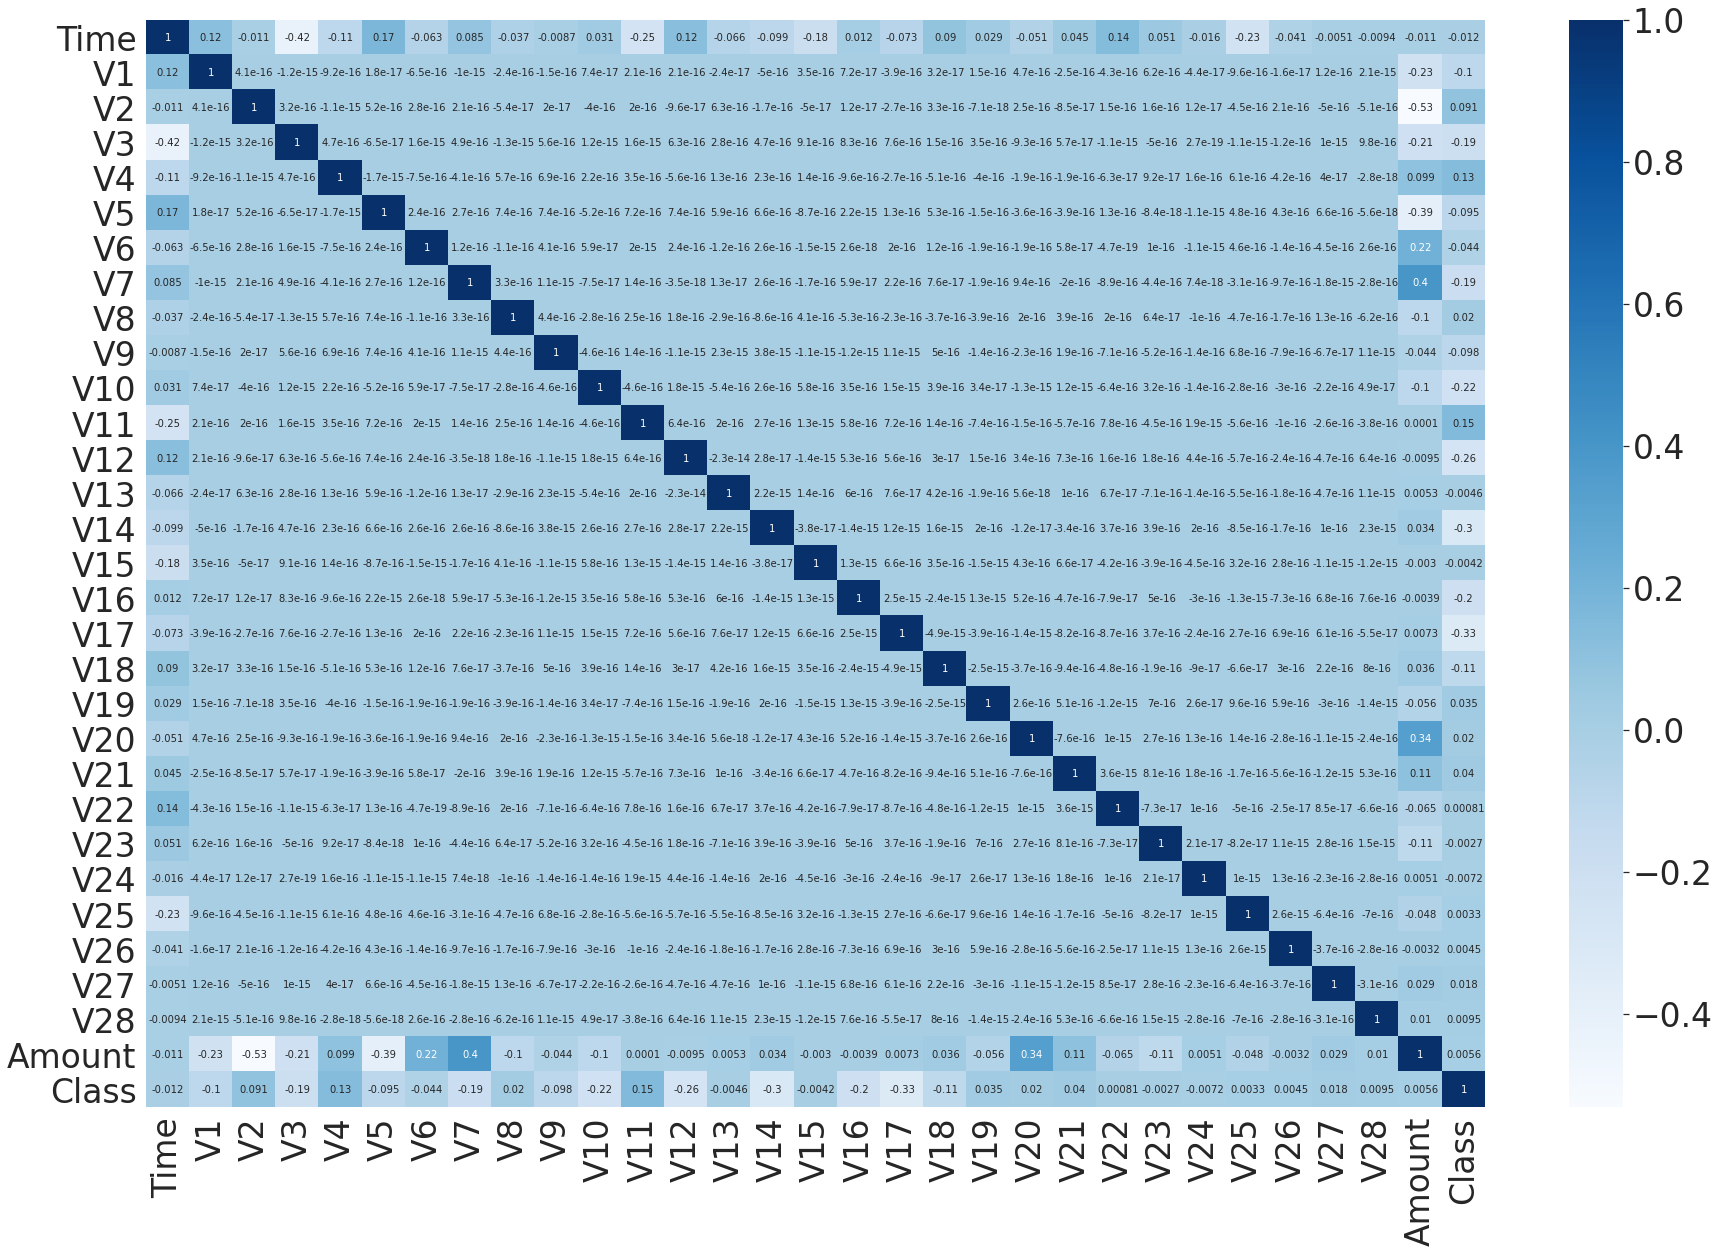

In [25]:
#correlation heapmap 
plt.figure(figsize=(30,20))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()


A value of 1 indicating a very strong positive relation between the two variables, 
while a value of -1 indicating a very strong negative relation, and a value of 0 indicates no relation

looking into the relation between the independent variables and the dependent variable Class, 
and see which variables is highly correlated with our target variable the Class. 

From the visualization, the top 3 independent variables are {V12,V14,V17}.


**Scaterplot 
**
Ploting each one of the interesting variables against a very boring variable V13 and color each data point with corresponding to it's label (Fraud or Normal)

<AxesSubplot:xlabel='V13', ylabel='V17'>

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


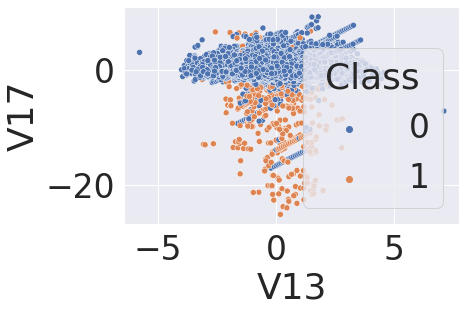

In [26]:
sns.scatterplot(x=data['V13'], y=data['V17'], hue=data['Class'])


<AxesSubplot:xlabel='V13', ylabel='V14'>

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


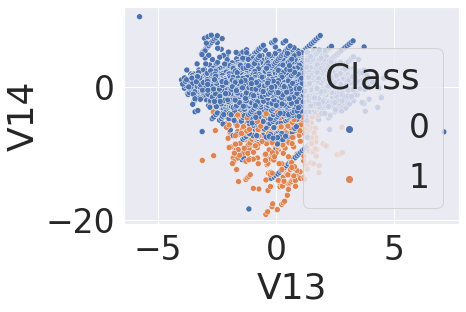

In [27]:
sns.scatterplot(x=data['V13'], y=data['V14'], hue=data['Class'])


<AxesSubplot:xlabel='V13', ylabel='V12'>

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


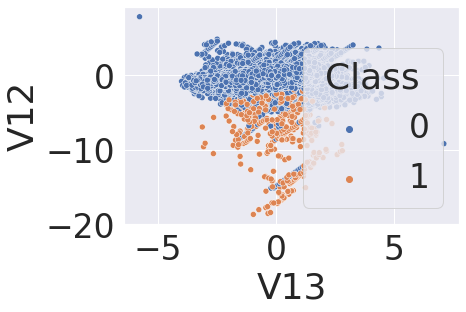

In [28]:
sns.scatterplot(x=data['V13'], y=data['V12'], hue=data['Class'])


From all three plots, we can observe a horizontal line that classifies almost all data points into their correct Class value. In other words, if we look at the y-axis that corresponds to one of the interesting variables {V17, V14, V12}, then we can see that most fraudulent data points are located below the value of -5 and normal data points are located above.

In contrast, if we look at the x-axis where the boring variable is, then both fraudulent and normal data points are almost equally distributed between -4 and 4, which means that we can't draw a vertical line to separate the two groups.

Is that good enough?

No. Although scatter plots gave us a general idea of what is going on, but they are not precise. So how we can take a better view?

**Kernel density estimation (KDE) plots
**
Take each one of the interesting variables and approximate the underlying probability density function for each Class value (Frauds Vs. Normal) using kernel density estimation. This should give us a clear idea of how fraudulent and normal datapoints (credit card transactions) are distributed along each variable.

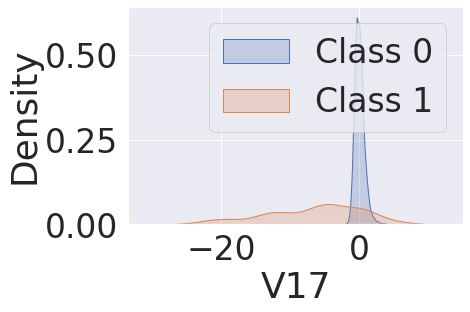

In [29]:
# Plot KDE for V17 values that belong to Class 0 (Normal)
sns.kdeplot(data=data[data['Class']==0]['V17'],label="Class 0",shade=True)
# Plot KDE for V17 values that belong to Class 1 (Fraud)
sns.kdeplot(data=data[data['Class']==1]['V17'],label="Class 1",shade=True)
plt.legend() #didn't have legends showing before adding this line


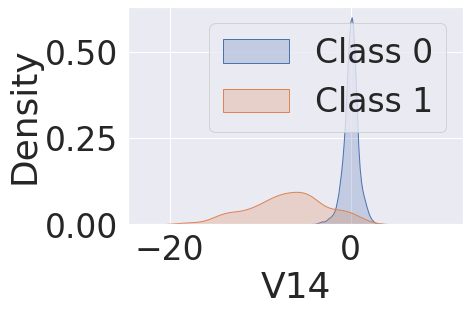

In [30]:
# Plot KDE for V14 values that belong to Class 0 (Normal)
sns.kdeplot(data=data[data['Class']==0]['V14'],label="Class 0",shade=True)
# Plot KDE for V14 values that belong to Class 1 (Fraud)
sns.kdeplot(data=data[data['Class']==1]['V14'],label="Class 1",shade=True)
plt.legend() #didn't have legends showing before adding this line


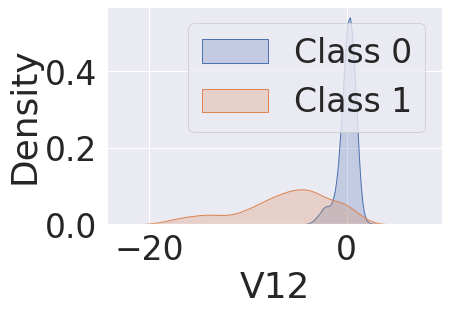

In [31]:
# Plot KDE for V12 values that belong to Class 0 (Normal)
sns.kdeplot(data=data[data['Class']==0]['V12'],label="Class 0",shade=True)
# Plot KDE for V12 values that belong to Class 1 (Fraud)
sns.kdeplot(data=data[data['Class']==1]['V12'],label="Class 1",shade=True)
plt.legend() #didn't have legends showing before adding this line


Let's summarize our findings in the following points:

In every interesting variable, the distribution of the normal transaction takes a shape that very close to the standard normal distribution.
In every interesting variable, the distribution of the fraudulent transaction takes a shape that very close to a normal distribution with height standard deviation (highly spread).
In the boring variable, both fraudulent and normal transactions have the same distribution. close to standard normal distribution.

Now let's display some statistical measurements to support our findings.



In [32]:
# Values of the variable V14 that belong to Class 0 (Normal)
data[data['Class'] == 0]['V14'].describe()

count    284315.000000
mean          0.012064
std           0.897007
min         -18.392091
25%          -0.422453
50%           0.051947
75%           0.494104
max          10.526766
Name: V14, dtype: float64

In [33]:
# Values of the variable V14 that belong to Class 1 (Fraud)
data[data['Class'] == 1]['V14'].describe()

count    492.000000
mean      -6.971723
std        4.278940
min      -19.214325
25%       -9.692723
50%       -6.729720
75%       -4.282821
max        3.442422
Name: V14, dtype: float64

In [34]:
# The true lables
y = data.Class

# This is our classifier 
high_accuracy_y = [0 if i>-4 and i<4 else 1 for i in data['V14']]

# Calculate accuracy
accuracy_score(y, high_accuracy_y)

0.9969944558946936

Thus, from these two statistic findings, by only using the variable V14 and only one line of code, I can achieve an accuracy of 99% predicting whether a credit card transaction is fraudulent or normal.

**However, one thing to consider
**This data set is highly imbalanced, and the positive class (frauds) account for only 0.172% of all transactions.

What does that mean?

Well, the accuracy metric is not a fair measurement of the performance of my classifier, because if I classified all negative (normal) transactions correctly, then I will achieve a very high accuracy since almost all data points belong to this class, and it does not matter how many data points from the other class I classified correctly. That is exactly what I did, I figured out from the KDE that most normal transactions have a V14 value between 4 and -4.

Solution?

We should consider another metric to measure how many data points from the positive class did we classify correctly, and that metric is called Recall. So let's display the confusion matrix and calculate the Recall.

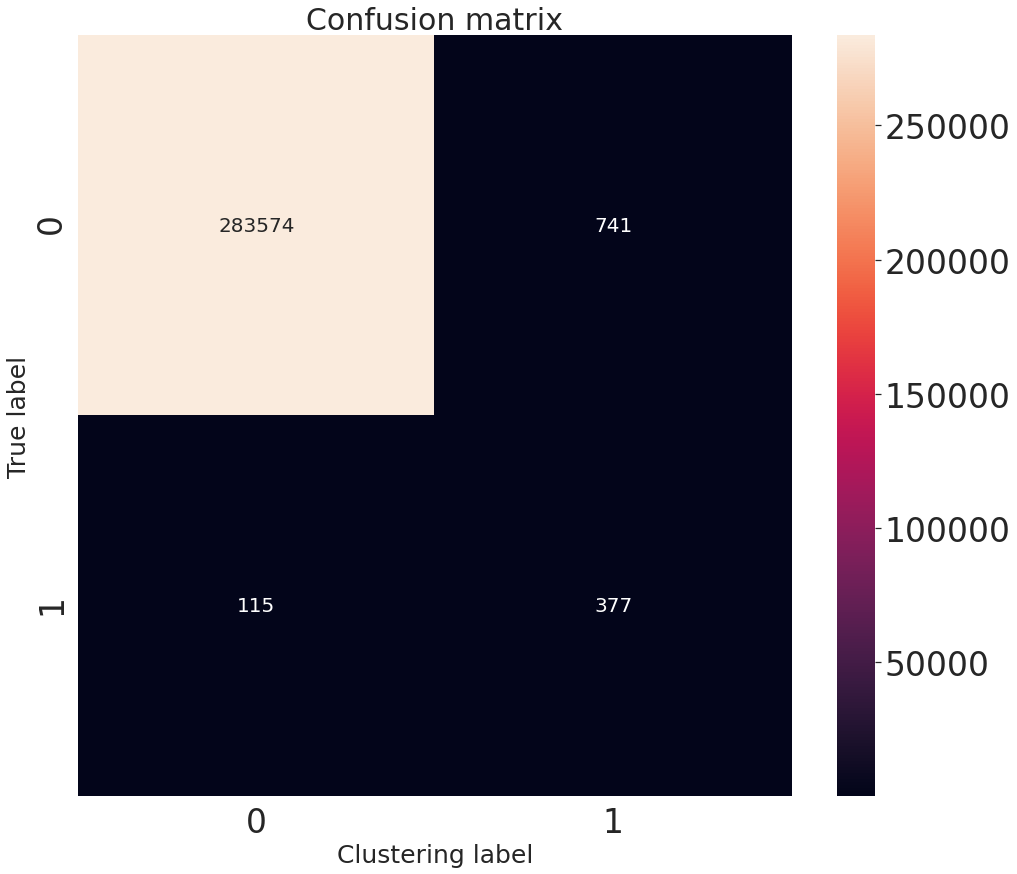

In [35]:
# Display confusion matrix for our high accuracy classifier
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y, high_accuracy_y)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [36]:
TN = confusion_matrix[0][0] # True Negative
FP = confusion_matrix[0][1] # False Positive
FN = confusion_matrix[1][0] # False Negative
TP = confusion_matrix[1][1] # True Positive
# Recall
TP/(TP+FN)

0.766260162601626

We got a Recall of 76%, which is not that bad, but I claim that we can do better. But how can we classify more of the positive transactions correctly?

The idea is to narrow down the interval for the negative transactions. By doing that, we are going to miss classify some of the negative transactions which will decrease the accuracy. But in return, we will increase the number of correctly classified positive transactions which increases the recall. It's a tradeoff! If you look at the KDE of V14 this will make much more sense.

In [37]:
# This is our high recall classifier 
high_recall_y = [0 if i>-1.05 and i<3 else 1 for i in data['V14']]

accuracy_score(y, high_recall_y)


0.9064664843209612

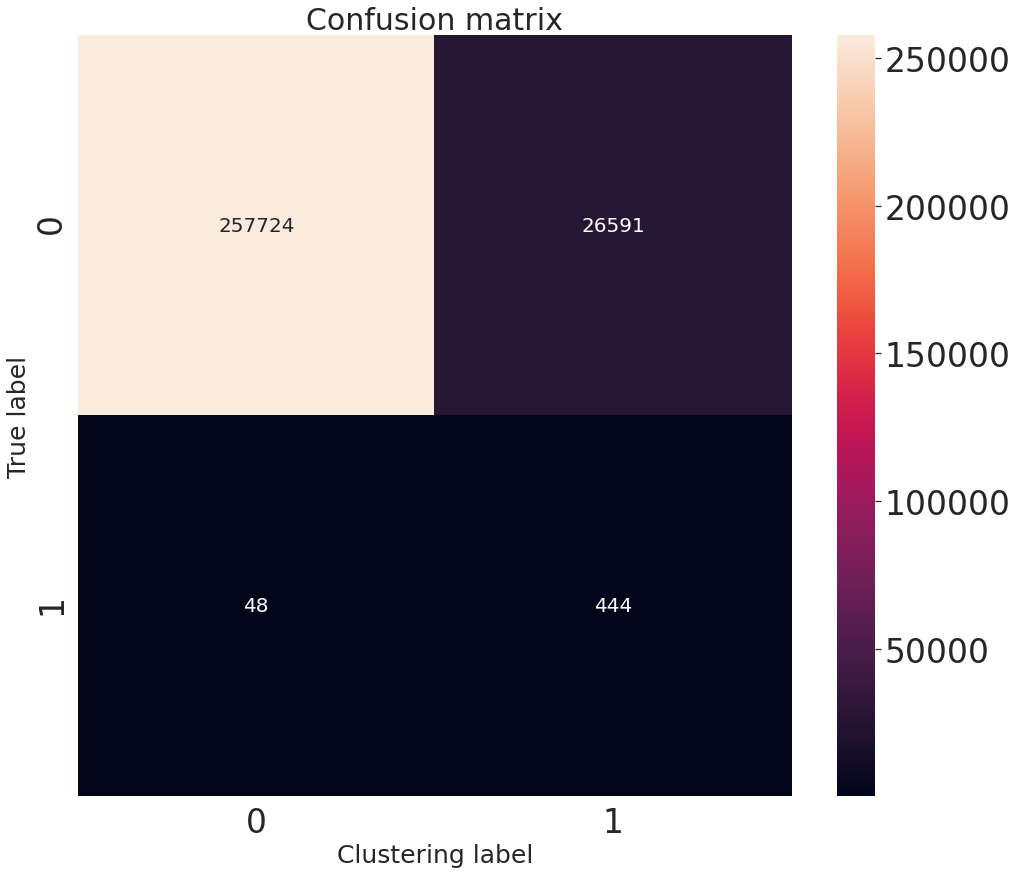

In [38]:
# Display confusion matrix for our high recall classifier
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y, high_recall_y)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [39]:
TN = confusion_matrix[0][0] # True Negative
FP = confusion_matrix[0][1] # False Positive
FN = confusion_matrix[1][0] # False Negative
TP = confusion_matrix[1][1] # True Positive
# Recall
TP/(TP+FN)

0.9024390243902439

Now, we have a fair trade-off with 90% for both accuracy and recall. I can continue trying to find a better interval

In [40]:
X = data[['V17', 'V14', 'V12']]
kmeans = KMeans(n_clusters=2, max_iter=3000, n_init=20)
"""
n_init. (default=10)
Number of time the k-means algorithm will be run with different centroid seeds. 
The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iter(default=300)
Maximum number of iterations of the k-means algorithm for a single run.

The k-means algorithm captures the insight that each point in a cluster should be near to the center of that cluster. 
It works like this: first we choose k, the number of clusters we want to find in the data. 
Then, the centers of those k clusters, called centroids, are initialized in some fashion.

The algorithm then proceeds in two alternating parts: In the Reassign Points step, we assign every point in the data to 
the cluster whose centroid is nearest to it. In the Update Centroids step, we recalculate each centroid's location as the 
mean (center) of all the points assigned to its cluster. We then iterate these steps until the centroids stop moving, or 
equivalently until the points stop switching clusters.




"""

# Fit and then store predictions in y_pred_kmeans
y_pred_kmeans = kmeans.fit_predict(X)
# Calculate accuracy
accuracy_score(y, y_pred_kmeans)

0.8737531029785083

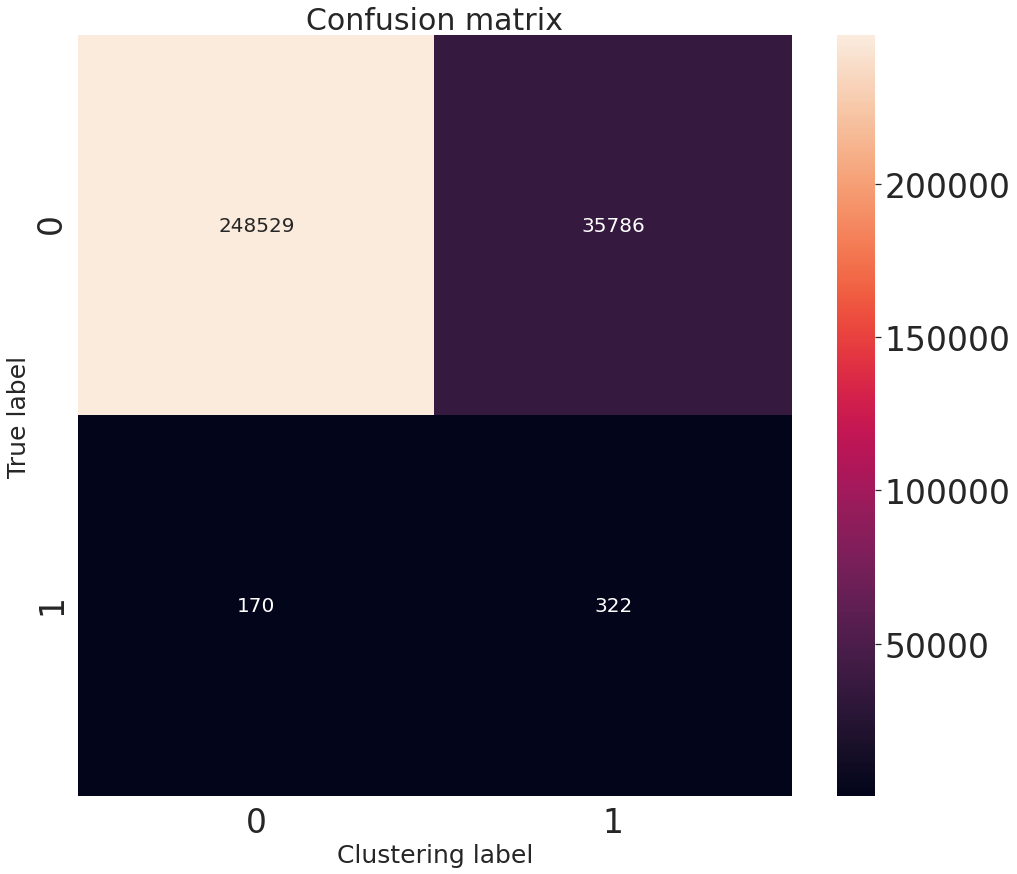

In [41]:
# Display confusion matrix for K-means
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred_kmeans)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [42]:
TN = confusion_matrix[0][0] # True Negative
FP = confusion_matrix[0][1] # False Positive
FN = confusion_matrix[1][0] # False Negative
TP = confusion_matrix[1][1] # True Positive
# Recall
TP/(TP+FN)

0.6544715447154471

6. Conclusion
By a careful exploration of the dataset, we successfully identified the most important independent variables. We also understood their relationship with the dependent variable, and that led us to a simple solution for this dataset using only one variable and one line of code. Moreover, we showed that our elegant solution outperformed a KMeans model built using the top three independent variables.